## vgg16迁移学习训练数据EnglishFnt
***题目：使用卷积神经元网络CNN，对多种字体的26个大写英文字母进行识别。
<br>数据集介绍：</br>
<br>1- 数据集来源于Chars74K dataset，本项目选用数据集EnglishFnt中的一部分。Chars74K dataset网址链接 http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/</br>
<br>2- A-Z共26种英文字母，每种字母对应一个文件夹（Sample011对应字母A, Sample012对应字母B,…, Sample036对应字母Z）；</br>
<br>3- Sample011到Sample036每个文件夹下相同字母不同字体的图片约1000张，PNG格式</br>***


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
from torchsummary import  summary
from torchvision.models import vgg16
from sklearn.model_selection import train_test_split
# import pandas as pd 
import os 

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### 读取数据

In [2]:
pic_1=plt.imread('./project2/Sample011/img011-00002.png')
pic_1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

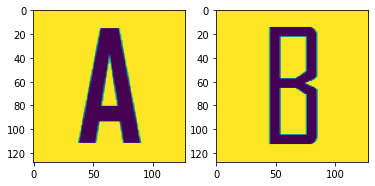

In [3]:
pic_2=plt.imread('./project2/Sample012/img012-00001.png')
fig,[ax1,ax2]=plt.subplots(1,2)
ax1.imshow(pic_1)
ax2.imshow(pic_2)

### 查看vgg16的模型细节

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg16=vgg16(pretrained=True)  #第一次需要下载一段时间
    def forward(self,input):
        output=self.vgg16(input)
        return output

In [5]:
model=Net()
summary(model=model,input_size=[(3,128,128)],batch_size=32,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 128, 128]           1,792
              ReLU-2         [32, 64, 128, 128]               0
            Conv2d-3         [32, 64, 128, 128]          36,928
              ReLU-4         [32, 64, 128, 128]               0
         MaxPool2d-5           [32, 64, 64, 64]               0
            Conv2d-6          [32, 128, 64, 64]          73,856
              ReLU-7          [32, 128, 64, 64]               0
            Conv2d-8          [32, 128, 64, 64]         147,584
              ReLU-9          [32, 128, 64, 64]               0
        MaxPool2d-10          [32, 128, 32, 32]               0
           Conv2d-11          [32, 256, 32, 32]         295,168
             ReLU-12          [32, 256, 32, 32]               0
           Conv2d-13          [32, 256, 32, 32]         590,080
             ReLU-14          [32, 256,

In [6]:
vgg16=vgg16(pretrained=True)

#### 卷积层

In [7]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

#### 全连接层(也是我们修改的地方)

In [8]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

#### vgg16所有的参数

In [9]:
i=0
for param in vgg16.parameters():
    i=i+1
    print(i,param.shape)

1 torch.Size([64, 3, 3, 3])
2 torch.Size([64])
3 torch.Size([64, 64, 3, 3])
4 torch.Size([64])
5 torch.Size([128, 64, 3, 3])
6 torch.Size([128])
7 torch.Size([128, 128, 3, 3])
8 torch.Size([128])
9 torch.Size([256, 128, 3, 3])
10 torch.Size([256])
11 torch.Size([256, 256, 3, 3])
12 torch.Size([256])
13 torch.Size([256, 256, 3, 3])
14 torch.Size([256])
15 torch.Size([512, 256, 3, 3])
16 torch.Size([512])
17 torch.Size([512, 512, 3, 3])
18 torch.Size([512])
19 torch.Size([512, 512, 3, 3])
20 torch.Size([512])
21 torch.Size([512, 512, 3, 3])
22 torch.Size([512])
23 torch.Size([512, 512, 3, 3])
24 torch.Size([512])
25 torch.Size([512, 512, 3, 3])
26 torch.Size([512])
27 torch.Size([4096, 25088])
28 torch.Size([4096])
29 torch.Size([4096, 4096])
30 torch.Size([4096])
31 torch.Size([1000, 4096])
32 torch.Size([1000])


###### EnglishFnt字母案例 的单通道 vgg16的第一层为Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 通道为3 这里需要修改

In [10]:
vgg16.features[0]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [11]:
vgg16.features[0].parameters()

<generator object Module.parameters at 0x000002BE4017EDE0>

### 重构vgg16模型

In [2]:
class vgg16_EnglishFnt(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg16 = vgg16(pretrained=True)  # 第一次运行需要下载一段时间
        # 构造自己的全连接 来替换vgg16的全连接层
        my_classifier = nn.Sequential(
            nn.Linear(in_features=25088, out_features=200, bias=True),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=200, out_features=26)
        )
        # 替换全连接层
        self.vgg16.classifier = my_classifier
        # EnglishFnt字母案例 的单通道 vgg16的第一层通道为3 这里需要修改为1
        self.vgg16.features[0] = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        # 先冻结vgg16卷积层的所有参数
        for param in self.vgg16.parameters():
            param.requires_grad = False
        # 更新卷积层的某几层
        for i in [1,2,3]:
            for param in self.vgg16.features[i].parameters():
                param.requires_grad=True

        # 更新全连接层
        for param in self.vgg16.classifier.parameters():
            param.requires_grad = True

    def forward(self, input):
        output = self.vgg16(input)
        return output


In [3]:
summary(vgg16_EnglishFnt(),input_size=[(1,128,128)],batch_size=32,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 128, 128]             640
              ReLU-2         [32, 64, 128, 128]               0
            Conv2d-3         [32, 64, 128, 128]          36,928
              ReLU-4         [32, 64, 128, 128]               0
         MaxPool2d-5           [32, 64, 64, 64]               0
            Conv2d-6          [32, 128, 64, 64]          73,856
              ReLU-7          [32, 128, 64, 64]               0
            Conv2d-8          [32, 128, 64, 64]         147,584
              ReLU-9          [32, 128, 64, 64]               0
        MaxPool2d-10          [32, 128, 32, 32]               0
           Conv2d-11          [32, 256, 32, 32]         295,168
             ReLU-12          [32, 256, 32, 32]               0
           Conv2d-13          [32, 256, 32, 32]         590,080
             ReLU-14          [32, 256,

### 数据集划分

In [3]:
path='./project2/'
batch_size=32
transforms=torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(1),  #把通道改为1
    torchvision.transforms.ToTensor()
])
data_set=torchvision.datasets.ImageFolder(path,transform=transforms)
# 数据集划分
train_data,test_data=train_test_split(data_set,random_state=666,shuffle=True,test_size=0.2)
train_data_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_data_loader=torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True)

In [4]:
print(len(data_set))
print(len(train_data_loader))
print(len(test_data_loader))

26416
661
166


In [5]:
model=vgg16_EnglishFnt().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
crossEntropyLoss=nn.CrossEntropyLoss() 
#模型加载
if os.path.exists('./EnglishFnt_vgg_model/model.pkl'):
    model.load_state_dict(torch.load('./EnglishFnt_vgg_model/model.pkl'))
    optimizer.load_state_dict(torch.load('./EnglishFnt_vgg_model/optimizer.pkl'))

def train(epoch,data_loader):
    loss_list=[]
    for index,(input,target) in enumerate(data_loader):
        #GPU
        input=input.to(device)
        target=target.to(device)
        output=model(input)
        loss=crossEntropyLoss(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #模型保存
        if index %60==0:
            print(epoch," loss: ",loss.item())
            loss_list.append(loss.item())
            torch.save(model.state_dict(),'./EnglishFnt_vgg_model/model.pkl')
            torch.save(optimizer.state_dict(),'./EnglishFnt_vgg_model/optimizer.pkl')
    
    return loss_list 

### 训练模型

In [11]:
loss_list=[]
for i in range(3):
    loss=train(i,train_data_loader)
    loss_list.extend(loss)

0  loss:  3.2774171829223633
0  loss:  0.7037938833236694
0  loss:  0.661776602268219
0  loss:  0.4254465103149414
0  loss:  0.6839636564254761
0  loss:  0.5345519781112671
0  loss:  0.5305336713790894
0  loss:  0.4035395681858063
0  loss:  0.2451334446668625
0  loss:  0.286920964717865
0  loss:  0.33057665824890137
0  loss:  0.04623543843626976
1  loss:  0.5463806390762329
1  loss:  0.31869521737098694
1  loss:  0.20650525391101837
1  loss:  0.16255952417850494
1  loss:  0.14449888467788696
1  loss:  0.10116337239742279
1  loss:  0.090663842856884
1  loss:  0.06764978915452957
1  loss:  0.5820717215538025
1  loss:  0.27056074142456055
1  loss:  0.07116153836250305
1  loss:  0.8099269866943359
2  loss:  0.13622702658176422
2  loss:  0.327629417181015
2  loss:  0.29628613591194153
2  loss:  0.2106926143169403
2  loss:  0.30548542737960815
2  loss:  0.12387842684984207
2  loss:  0.19674548506736755
2  loss:  0.20625194907188416
2  loss:  0.14513486623764038
2  loss:  0.03678629919886589


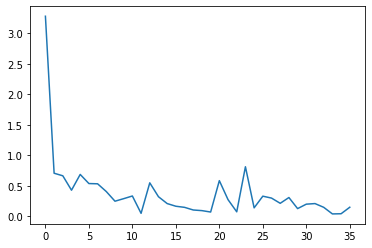

In [12]:
plt.plot(loss_list)

In [70]:
def test(data_loader):
    acc_list = []
    # 模型加载
    if os.path.exists('./EnglishFnt_vgg_model/model.pkl'):
        model.load_state_dict(torch.load('./EnglishFnt_vgg_model/model.pkl'))
        optimizer.load_state_dict(torch.load(
            './EnglishFnt_vgg_model/optimizer.pkl'))

    sum = 0

    for index, (input, target) in enumerate(data_loader):
        # GPU
        input = input.to(device)
        target = target.to(device)
        output = model(input)
        y = torch.max(output, dim=1)[1]
        sum += (y == target).sum()
        acc = sum/len(data_loader)/batch_size

        acc_list.append(acc.item())
        if index % 20 == 0:
            print("acc:", acc.item())
    print("acc:", acc.item())
    acc_list.append(acc.item())
    return acc_list

In [11]:
def test_cpu(data_loader):
    acc_list = []
    # 模型加载
    if os.path.exists('./EnglishFnt_vgg_model/model.pkl'):
        model.load_state_dict(torch.load('./EnglishFnt_vgg_model/model.pkl'))
        optimizer.load_state_dict(torch.load(
            './EnglishFnt_vgg_model/optimizer.pkl'))

    sum = 0

    for index, (input, target) in enumerate(data_loader):
        output = model(input)
        y = torch.max(output, dim=1)[1]
        sum += (y == target).sum()
        acc = sum/len(data_loader)/batch_size
        acc_list.append(acc.item())
        if index % 20 == 0:
            print("acc:", acc.item())
    print("acc:", acc.item())
    acc_list.append(acc.item())
    return acc_list

#### gpu 内部不足
***CUDA out of memory. Tried to allocate 128.00 MiB (GPU 0; 2.00 GiB total capacity; 976.60 MiB already allocated; 105.00 MiB free; 996.00 MiB reserved in total by PyTorch)***

In [73]:
# model = vgg16_EnglishFnt().to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# crossEntropyLoss = nn.CrossEntropyLoss()
# acc_list=test(train_data_loader) 

#### cpu版本

In [13]:
model = vgg16_EnglishFnt()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
crossEntropyLoss = nn.CrossEntropyLoss()
acc_list=test_cpu(test_data_loader)

acc: 0.005459337495267391
acc: 0.11803463846445084
acc: 0.22948041558265686
acc: 0.3422439694404602
acc: 0.4525602459907532
acc: 0.5625
acc: 0.6737575531005859
acc: 0.7859563231468201
acc: 0.8960843086242676
acc: 0.9182981848716736


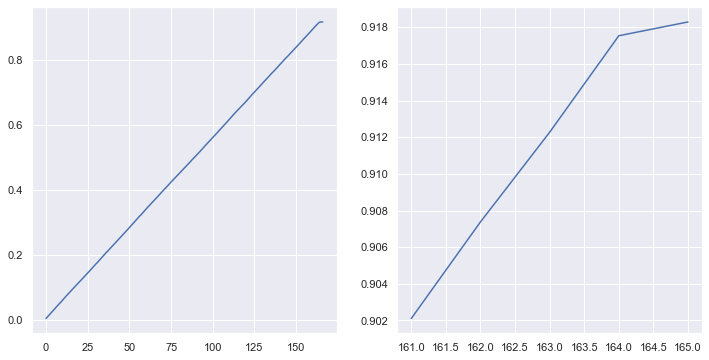

In [66]:
sns.set()
fig,[axe1,axe2]=plt.subplots(1,2,figsize=(12,6))
axe1.plot(np.arange(len(acc_list)),acc_list) 
axe2.plot(np.arange(len(acc_list))[-6:-1],acc_list[-6:-1])